# Question_4: Plot the number of stations per city in function of number of inhabitants.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
NumberOfStationsPerCity = pd.read_csv(r'C:\users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\facilities.csv', sep=',')
NumberOfStationsPerCity

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
0,http://irail.be/stations/NMBS/008734201,Arras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://irail.be/stations/NMBS/008015345,Aachen Hbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://irail.be/stations/NMBS/008895000,Aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,06:00,20:00,06:00,20:00
3,http://irail.be/stations/NMBS/008895125,Aalst-Kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://irail.be/stations/NMBS/008891140,Aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,07:00,14:15,07:00,14:15,07:00,14:15,07:45,15:00,07:45,15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,http://irail.be/stations/NMBS/008832334,Zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,http://irail.be/stations/NMBS/008895208,Zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,07:15,14:30,07:15,14:30
671,http://irail.be/stations/NMBS/008891611,Zwankendamme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,http://irail.be/stations/NMBS/008894821,Zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = pd.DataFrame(NumberOfStationsPerCity)
df2 = df.groupby('city').size().reset_index(name='count') # head(5)dan toon je maar 5lijnen, eruit halen op termijn
df2.head(5)

,city,count
0,Aalst,2
1,Aalter,1
2,Aarschot,2
3,Aarsele,1
4,Aiseau-Presles,1


In [12]:
NumberOfInhabitants = pd.read_excel(r'C:\users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\inhabitants_prov.xlsx')
NumberOfInhabitants

,Place of residence,Population on 1st January 2021
0,Brussel,1219970
1,Antwerpen,1875524
2,Limburg,880397
3,Oost-Vlaanderen,1531745
4,Vlaams Brabant,1162084
5,West-Vlaanderen,1203312
6,Waals Brabant,407397
7,Henegouwen,1345947
8,Luik,1109067
9,Luxemburg,288722


In [29]:
NumberOfInhabitants = NumberOfInhabitants.rename(index=str, columns={'Place of residence': 'NE_Name'})
NumberOfInhabitants

,NE_Name,Population on 1st January 2021
0,Brussel,1219970
1,Antwerpen,1875524
2,Limburg,880397
3,Oost-Vlaanderen,1531745
4,Vlaams Brabant,1162084
5,West-Vlaanderen,1203312
6,Waals Brabant,407397
7,Henegouwen,1345947
8,Luik,1109067
9,Luxemburg,288722


In [31]:
map_df = gpd.read_file('C:/Users/Annelien/Documents/SCHOOL/ACRM/Project NMBS/group7-group-assignment-/Data/BELGIUM_-_Provinces.zip')
map_df
map_df['NE_Name'].unique()

array(['Antwerpen', 'Brussel', 'Vlaams Brabant', 'Waals Brabant',
       'West-Vlaanderen', 'Oost-Vlaanderen', 'Henegouwen', 'Luik',
       'Limburg', 'Luxemburg', 'Namen'], dtype=object)

<AxesSubplot: >

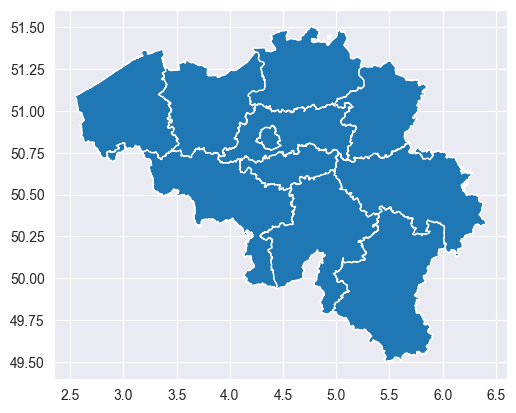

In [30]:
map_df.plot()

In [32]:
map_df = map_df.merge(NumberOfInhabitants, on='NE_Name')
map_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,Population on 1st January 2021
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",1875524
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",1219970
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",1162084
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",407397
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",1203312


<AxesSubplot: >

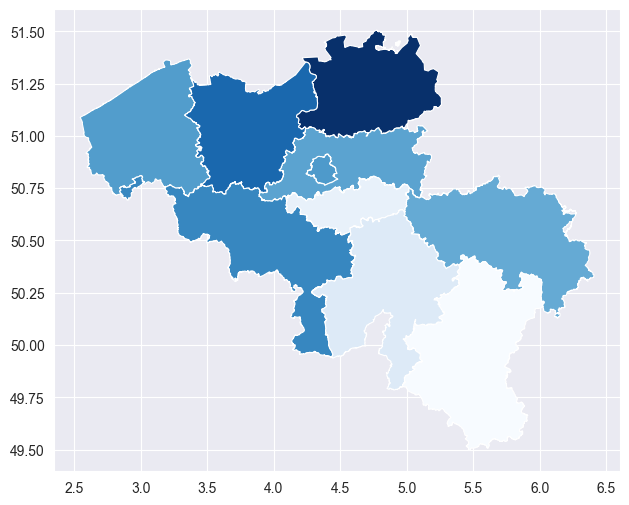

In [33]:
fig, ax = plt.subplots(1, figsize =(10,6))
map_df.plot(column='Population on 1st January 2021', cmap='Blues', linewidth=0.8, ax=ax)

KeyError: 'longitude'

In [40]:
df = pd.DataFrame(NumberOfStationsPerCity)
df3 = pd.DataFrame(NumberOfStationsPerCity, columns=['longitude', 'latitude'])


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

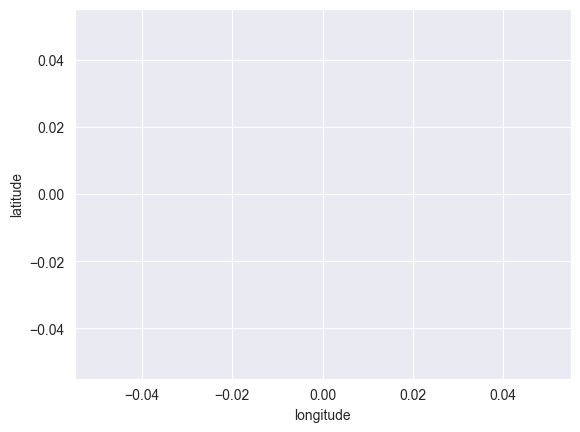

In [41]:
df3.plot('longitude','latitude', 'scatter', color ='red')

KeyError: 'name'

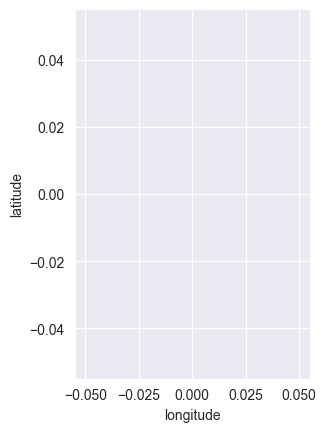

In [43]:
ax = df3.plot('longitude', 'latitude', 'scatter', color='red', zorder =2)
map_df.plot(column='name', cmap='BuGn', lindewidth = 0.8, ax=ax, zorder=1)